In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**PRIMERA VISIÓN**

In [3]:
# Read the Excel Listening file into a DataFrame
data_list = pd.read_excel(os.path.join("data", "listings.xlsx"))
data_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            17825 non-null  int64         
 1   listing_url                                   17825 non-null  object        
 2   scrape_id                                     17825 non-null  int64         
 3   last_scraped                                  17825 non-null  datetime64[ns]
 4   name                                          17792 non-null  object        
 5   description                                   17536 non-null  object        
 6   neighborhood_overview                         11705 non-null  object        
 7   picture_url                                   17825 non-null  object        
 8   host_id                                       17825 non-null  int6

In [4]:
#INTERVALO DEL PRECIO:
print("INTERVALO DEL PRECIO")
#Tabla de frecuencia:
#Create a new datarfame with unique values and type of each column in the dataframe
data_list_unique = pd.DataFrame({'Column Name': data_list.columns, 'Unique Values': [data_list[col].nunique() for col in data_list.columns], 'Data Type': [data_list[col].dtype for col in data_list.columns]})
review_scores_rating = data_list['review_scores_rating'].dropna()

print("\n¿Entre que puntajes está el 53% de las calificaciones de revisión más bajas de la plataforma?")

#Creación de intervalos
intervalos = [20+i*6 for i in range(0, 15)]

#Conteo
conteo,_ = np.histogram(review_scores_rating, bins=intervalos)

#Creación de la tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': [f"{intervalos[i]} - {intervalos[i+1]}" for i in range(len(intervalos)-1)],
    'Frecuencia': conteo
})

tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()
tabla_frecuencias['Frecuencia Relativa Porcentual %'] = tabla_frecuencias['Frecuencia Relativa'] * 100
tabla_frecuencias['Frecuencia Relativa Porcentual Acumulada %'] = tabla_frecuencias['Frecuencia Relativa Acumulada'] * 100
tabla_frecuencias = tabla_frecuencias.round(4)
print("\nTabla de frecuencias:")
print("Entre 20 a 98 puntos se encuentra el 53% de las calificaciones de revisión más bajas de la plataforma.")
tabla_frecuencias

INTERVALO DEL PRECIO

¿Entre que puntajes está el 53% de las calificaciones de revisión más bajas de la plataforma?

Tabla de frecuencias:
Entre 20 a 98 puntos se encuentra el 53% de las calificaciones de revisión más bajas de la plataforma.


,Intervalo,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada,Frecuencia Relativa Porcentual %,Frecuencia Relativa Porcentual Acumulada %
0,20 - 26,24,24,0.0016,0.0016,0.1580,0.1580
1,26 - 32,0,24,0.0000,0.0016,0.0000,0.1580
2,32 - 38,1,25,0.0001,0.0016,0.0066,0.1646
3,38 - 44,22,47,0.0014,0.0031,0.1449,0.3095
4,44 - 50,2,49,0.0001,0.0032,0.0132,0.3226
5,50 - 56,8,57,0.0005,0.0038,0.0527,0.3753
6,56 - 62,96,153,0.0063,0.0101,0.6321,1.0074
7,62 - 68,27,180,0.0018,0.0119,0.1778,1.1852
8,68 - 74,78,258,0.0051,0.0170,0.5136,1.6988
9,74 - 80,57,315,0.0038,0.0207,0.3753,2.0741


In [8]:
#PRICE

Price = data_list['price'].dropna()
Price = Price[Price > 0]  # Eliminar valores nulos y ceros

#Calcular la tabla de percentiles del 1 a 100.
percentiles = [i for i in range(1, 101)] 
percentiles_values = np.percentile(Price, percentiles)
tabla_percentiles = pd.DataFrame({
    'Percentil': percentiles,
    'Price': percentiles_values
})
print("¿Cuál es el precio promedio de alquiler de un inmueble qué se situé por encima del 78%?")
print("El promedio de alquiles de estos inmuebles es de: ", tabla_percentiles[(tabla_percentiles["Percentil"]>78) & (tabla_percentiles["Percentil"]<100)]["Price"].mean())
tabla_percentiles[tabla_percentiles["Percentil"]>78]

¿Cuál es el precio promedio de alquiler de un inmueble qué se situé por encima del 78%?
El promedio de alquiles de estos inmuebles es de:  276.86857142857116


,Percentil,Price
78,79,199.00
79,80,200.00
80,81,200.00
81,82,200.00
82,83,206.00
83,84,215.00
84,85,220.00
85,86,225.00
86,87,235.00
87,88,248.00


In [9]:
print("¿Qué porcentaje de inmuebles en la ciudad se alquilan por debajo del promedio de la ciudad? ")

mean_ = Price.mean()
tbl = tabla_percentiles[tabla_percentiles["Price"]<mean_]
print(f"\nEl procentaje de inmbueles en la ciudad se alquinal por debajo del promeido es del: {tbl["Percentil"].max()}%")
tbl

¿Qué porcentaje de inmuebles en la ciudad se alquilan por debajo del promedio de la ciudad? 

El procentaje de inmbueles en la ciudad se alquinal por debajo del promeido es del: 66%


,Percentil,Price
0,1,33.00
1,2,40.00
2,3,48.00
3,4,50.00
4,5,55.00
...,...,...
61,62,150.00
62,63,150.00
63,64,150.00
64,65,150.00


In [10]:
print("Se desea alquilar un inmueble en la ciudad de Ámsterdam que sea 100 euros \nmás costoso que el promedio distrital, ¿a cuantas desviaciones estaría este inmueble del \npromedio global?")

std_dev = Price.std()
mean_district = mean_ + 100
z_score = (mean_district-mean_) / (std_dev)

print("El valor buscado se encuentra a", round(z_score,0), "desviaciones estándar del promedio global.")

Se desea alquilar un inmueble en la ciudad de Ámsterdam que sea 100 euros 
más costoso que el promedio distrital, ¿a cuantas desviaciones estaría este inmueble del 
promedio global?
El valor buscado se encuentra a 1.0 desviaciones estándar del promedio global.


**VALIDACIÓN DE HIPÓTESIS PARA EL CASO DE USO AIRBNB**

- El 50% de las publicaciones de la plataforma, en su mayoría ofrecen habitaciones de hotel.
- La gran mayoría de las habitaciones privadas poseen precios entre 4 y 129 euros.
- Las casas y apartamentos poseen las calificaciones por revisión más altas de la plataforma.
- Las casas y apartamentos poseen la mayor dispersión respecto a sus precios de alquiler.
- Las publicaciones con mejor calificación de revisión y precio son casas y apartamentos, habitaciones de hotel.

In [11]:
print("Hipotesis 1: ")
print("\nEl 50% de las publicaciones de la plataforma, en su mayoría ofrecen habitaciones de hotel.")

data_list_ = data_list.copy()
#create a new column, it's a 0 or 1 number depending that it's a hotel room or not
data_list_['Hotel room'] = np.where(data_list_['room_type'] == 'Hotel room', 1, 0)
hotel_room = data_list_["Hotel room"].value_counts()[1]
index = data_list_.shape[0]

por_hotel_room = (hotel_room / index)* 100

if por_hotel_room != 50:
    print(f"\nNo es verdadero, solo el {por_hotel_room:.4f}% ofrecen habitaciones de hotel.")
else:
    print("\nEs cierto, el 50% de las publicaciones ofrecen habitaciones de hotel.")

Hipotesis 1: 

El 50% de las publicaciones de la plataforma, en su mayoría ofrecen habitaciones de hotel.

No es verdadero, solo el 0.6957% ofrecen habitaciones de hotel.


In [20]:
print("Hipotesis 2: ")
print("\nLa gran mayoría de las habitaciones privadas poseen precios entre 4 y 129 euros.")

n_unique = Price.nunique()
n_bins = min(100, n_unique)  # Nunca más de 100
data_list_['percentil'] = pd.qcut(data_list_['price'], q=n_bins, labels=False, duplicates='drop') + 1
grater_ = data_list_[data_list_["percentil"] < 75]
res_ = grater_[(grater_["price"] >= 4) & (grater_["price"] <= 129)]["price"].count()
total_ = grater_["price"].count()
if res_ / total_ >= 0.75:
    print(f"\nEs cierto, el {res_ / total_ * 100:.2f}% de las habitaciones privadas poseen precios entre 4 y 129 euros.")
elif res_ / total_ > 0.5:
    print(f"\nMás del 50% de las habitaicones privadas tienen {res_ / total_ * 100:.2f}% de las habitaciones privadas poseen precios entre 4 y 129 euros.")
else:
    print(f"\nNo es cierto, solo el {res_ / total_ * 100:.2f}% de las habitaciones privadas poseen precios entre 4 y 129 euros.")

Hipotesis 2: 

La gran mayoría de las habitaciones privadas poseen precios entre 4 y 129 euros.

Más del 50% de las habitaicones privadas tienen 50.36% de las habitaciones privadas poseen precios entre 4 y 129 euros.


In [66]:
print("Hipotesis 3: ")
print("\n¿Cuál es el tipo de room que tiene revisión más altas de la plataforma?.")
#Mean por cada room_type
mean_scores = data_list_.groupby('room_type')['review_scores_rating'].mean().sort_values(ascending=False).round(2)
print(f"\nLas casas y apartamentos poseen las calificaciones por revisión más altas de la plataforma con un promedio de revisión de {mean_scores["Entire home/apt"]:.2f}.")
print(f"\n{mean_scores}")

Hipotesis 3: 

¿Cuál es el tipo de room que tiene revisión más altas de la plataforma?.

Las casas y apartamentos poseen las calificaciones por revisión más altas de la plataforma con un promedio de revisión de 95.35.

room_type
Entire home/apt    95.35
Shared room        94.02
Hotel room         94.00
Private room       94.00
Name: review_scores_rating, dtype: float64


In [70]:
print("Hipotesis 4: ")
print("\nLas casas y apartamentos poseen la mayor dispersión respecto a sus precios de alquiler.")

#Desviación estándar por cada room_type
std_dev_prices = data_list_.groupby('room_type')['price'].std().sort_values(ascending=False).round(2)
print(f"\nNo es cierto, las casas y apartamentos no poseen la mayor dispersión respecto a sus precios de alquiler con una desviación estándar de {std_dev_prices["Entire home/apt"]:.2f}, el mayor es Hotel room con {std_dev_prices["Hotel room"]:.2f}."
)
print(f"\n{std_dev_prices}")


Hipotesis 4: 

Las casas y apartamentos poseen la mayor dispersión respecto a sus precios de alquiler.

No es cierto, las casas y apartamentos no poseen la mayor dispersión respecto a sus precios de alquiler con una desviación estándar de 160.08, el mayor es Hotel room con 165.63.

room_type
Hotel room         165.63
Entire home/apt    160.08
Shared room        123.83
Private room       113.51
Name: price, dtype: float64


In [ ]:
print("Hipotesis 5: ")
print("\nLas publicaciones con mejor calificación de revisión y precio son casas y apartamentos, habitaciones de hotel.")

#groupby room_type and get the mean of review_scores_rating and price
grouped = data_list_.groupby('room_type').agg({'review_scores_rating': 'mean', 'price': 'mean'}).sort_values(by=['review_scores_rating', 'price'], ascending=False).round(2)
print(f"\nLas publicaciones con mejor calificación de revisión y precio no son casas y apartamentos, y habitaciones de hotel; \nson {grouped.index[0]} con una calificación de revisión de {grouped.iloc[0]['review_scores_rating']:.2f} y un precio promedio de {grouped.iloc[0]['price']:.2f}.")
grouped


Hipotesis 5: 

Las publicaciones con mejor calificación de revisión y precio son casas y apartamentos, habitaciones de hotel.

No es cierto, las publicaciones con mejor calificación de revisión y precio no son casas y apartamentos, y habitaciones de hotel; 
son Entire home/apt con una calificación de revisión de 95.35 y un precio promedio de 169.86.


,review_scores_rating,price
room_type,,
Entire home/apt,95.35,169.86
Shared room,94.02,101.49
Hotel room,94.00,135.12
Private room,94.00,98.98


In [77]:
n_unique = Price.nunique()
n_bins = min(100, n_unique)  # Nunca más de 100
data_list_['percentil'] = pd.qcut(data_list_['price'], q=n_bins, labels=False, duplicates='drop') + 1
data_list_.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Hotel room,percentil,Apartament and House
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,2021-04-12,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,NaN,t,1,0,1,0,1.9,0,6,0


**Validación de hipótesis a partir de gráficos**

Hipotesis 1:

¿Cuál es el tipo de inmueble que más ha publicados Airbnb en la ciudad de Ámsterdam?


C:\Users\57317\AppData\Local\Temp\ipykernel_9056\706979311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_list_, x='room_type', order=data_list_['room_type'].value_counts().index, palette='viridis')


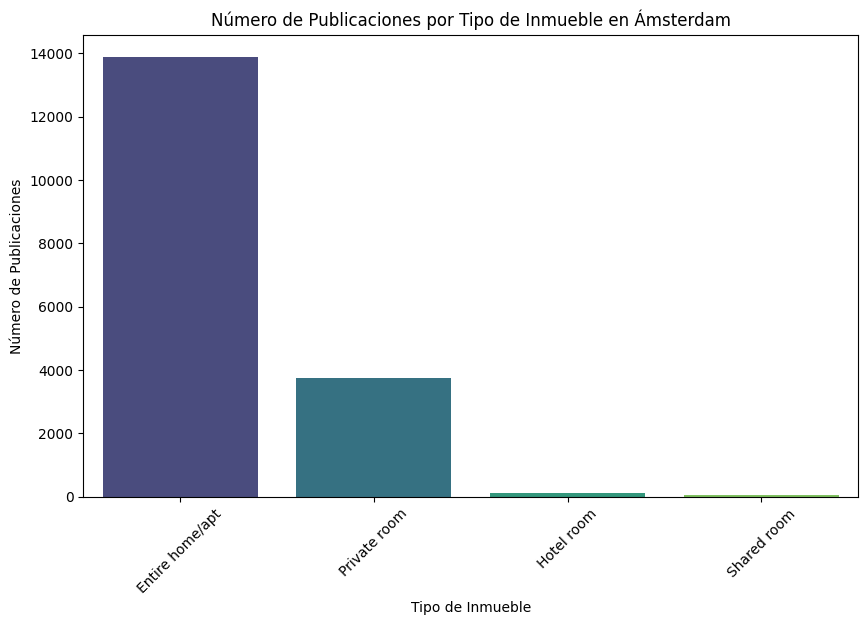


 El que tiene más publicaciones es el tipo de inmueble:  Entire home/apt


In [79]:
print("Hipotesis 1:")
print("\n¿Cuál es el tipo de inmueble que más ha publicados Airbnb en la ciudad de Ámsterdam?")

#Create a bar graphic of the number of publications by room_type in Amsterdam
plt.figure(figsize=(10, 6))
sns.countplot(data=data_list_, x='room_type', order=data_list_['room_type'].value_counts().index, palette='viridis')
plt.title('Número de Publicaciones por Tipo de Inmueble en Ámsterdam')
plt.xlabel('Tipo de Inmueble')
plt.ylabel('Número de Publicaciones')
plt.xticks(rotation=45)
plt.show()

print("\n El que tiene más publicaciones es el tipo de inmueble: ", data_list_['room_type'].value_counts().idxmax())

Hipotesis 2: 

¿Qué tipo de habitaciones posee los precios más económicos de la ciudad?


C:\Users\57317\AppData\Local\Temp\ipykernel_9056\1502275045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_list_, x='room_type', y='price', estimator=np.mean, errorbar=None, palette='viridis')


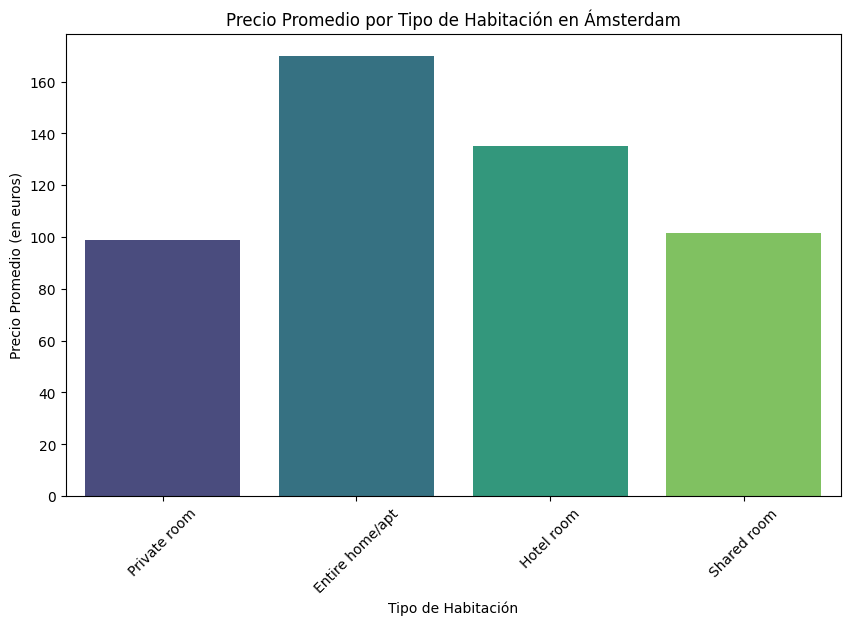


El tipo de habitación con los precios más económicos es:  Shared room


In [82]:
print("Hipotesis 2: ")
print("\n¿Qué tipo de habitaciones posee los precios más económicos de la ciudad?")

#Create bar plot of prices for each type room.
plt.figure(figsize=(10, 6))
sns.barplot(data=data_list_, x='room_type', y='price', estimator=np.mean, errorbar=None, palette='viridis')
plt.title('Precio Promedio por Tipo de Habitación en Ámsterdam')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio Promedio (en euros)')
plt.xticks(rotation=45)
plt.show()

print("\nEl tipo de habitación con los precios más económicos es: ", data_list_['room_type'].value_counts().idxmin())